In [1]:
# import libraries
import pandas as pd
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read Mapbox API Key
load_dotenv()
mapbox_api = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox_api)

In [146]:
from IPython.display import IFrame
IFrame("https://www.propertyguides.com/usa/media/sites/11/Florida-hurricane-GR.jpg", 
       width=700, 
       height=600,
       title="Landfalling Hurricanes"
)


In [5]:
# Import all hurricane landfalls from the Atlantic basin CSV to Panda Dataframes
file_path = Path("Subset_HURDAT_reverse_geo.csv")
HUR_data = pd.read_csv(file_path)

In [163]:
# Preview Data
HUR_data.head()

Hur_data_df = pd.DataFrame(HUR_data)

n = Hur_data_df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)


No.of.unique values in each column :
 Unnamed: 0                      964
index                           964
id                              608
name                            171
date                            962
record_identifier                 9
status_of_system                  7
latitude                        242
longitude                       313
maximum_sustained_wind_knots     29
maximum_pressure                101
34_kt_ne                         32
34_kt_se                         33
34_kt_sw                         27
34_kt_nw                         27
50_kt_ne                         24
50_kt_se                         20
50_kt_sw                         16
50_kt_nw                         16
64_kt_ne                         16
64_kt_se                         12
64_kt_sw                         12
64_kt_nw                         11
lat/long                        774
address                         450
dtype: int64


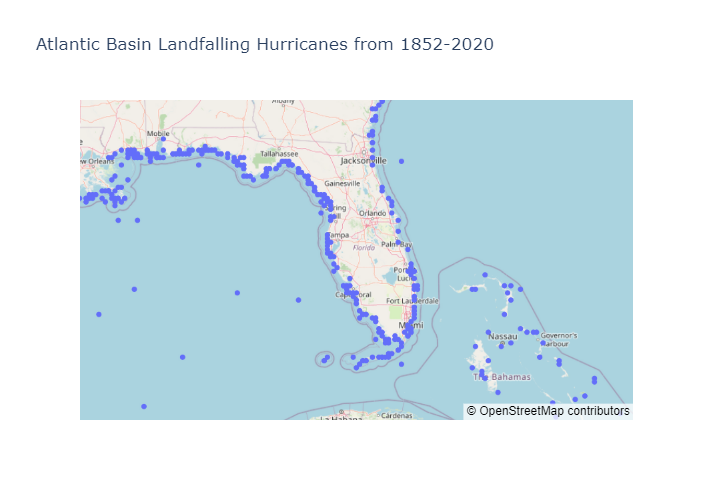

In [149]:
# Atlantic Basin landfalling hurricanes shown with MapBox
fl_county_map = px.scatter_mapbox(HUR_data,
    title = "Atlantic Basin Landfalling Hurricanes from 1852-2020",
    lat="latitude",
    lon="longitude",
    hover_name='name',                               
    zoom = 4.5,
    height = 500                              
)


fl_county_map.update_layout(mapbox_style="open-street-map")
fl_county_map.show()

In [85]:
Atlantic_full_file_path = Path("Fullset_2004_HUR.csv")
Atlantic_full_data = pd.read_csv(Atlantic_full_file_path)
Atlantic_full_data_df.head().head(2)

Atlantic_full_data_df = pd.DataFrame(Atlantic_full_data)
Atlantic_full_data_df.head(1)

index        id    name            date record_identifier  \
0  43129.0  AL022004  BONNIE  8/3/2004 12:00               NaN   

  status_of_system  latitude  longitude  maximum_sustained_wind_knots  \
0               TD      12.9      -53.6                          25.0   

   maximum_pressure  ...  34_kt_sw  34_kt_nw  50_kt_ne  50_kt_se  50_kt_sw  \
0            1010.0  ...       0.0       0.0       0.0       0.0       0.0   

   50_kt_nw  64_kt_ne  64_kt_se  64_kt_sw  64_kt_nw  
0       0.0       0.0       0.0       0.0       0.0  

[1 rows x 22 columns]

In [124]:
#drop the storms that do not make Florida landfall:

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'DANIELLE' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'NICOLE' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'UNNAMED' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'IVAN' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'GASTON' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

indexNames = Atlantic_full_data_df[Atlantic_full_data_df['name'] == 'EARL' ].index
Atlantic_full_data_df.drop(indexNames, inplace=True)

Atlantic_full_data_df

index        id    name            date record_identifier  \
0    43129.0  AL022004  BONNIE  8/3/2004 12:00               NaN   
1    43130.0  AL022004  BONNIE  8/3/2004 18:00               NaN   
2    43131.0  AL022004  BONNIE   8/4/2004 0:00               NaN   
3    43132.0  AL022004  BONNIE   8/4/2004 6:00               NaN   
4    43133.0  AL022004  BONNIE  8/4/2004 12:00               NaN   
..       ...       ...     ...             ...               ...   
450      NaN       NaN     NaN             NaN               NaN   
451      NaN       NaN     NaN             NaN               NaN   
452      NaN       NaN     NaN             NaN               NaN   
453      NaN       NaN     NaN             NaN               NaN   
454      NaN       NaN     NaN             NaN               NaN   

    status_of_system  latitude  longitude  maximum_sustained_wind_knots  \
0                 TD      12.9      -53.6                          25.0   
1                 TD      13.2      -55.4                          25.0   
2                 TD      13.5      -57.4                          30.0   
3                 TD      13.6      -59.5                          30.0   
4                 TD      13.6      -61.6                          30.0   
..               ...       ...        ...                           ...   
450              NaN       NaN        NaN                           NaN   
451              NaN       NaN        NaN                           NaN   
452              NaN       NaN        NaN                           NaN   
453              NaN       NaN        NaN                           NaN   
454              NaN       NaN        NaN                           NaN   

     maximum_pressure  ...  34_kt_sw  34_kt_nw  50_kt_ne  50_kt_se  50_kt_sw  \
0              1010.0  ...       0.0       0.0       0.0       0.0       0.0   
1              1010.0  ...       0.0       0.0       0.0       0.0       0.0   
2              1010.0  ...       0.0       0.0       0.0       0.0       0.0   
3              1010.0  ...       0.0       0.0       0.0       0.0       0.0   
4              1010.0  ...       0.0       0.0       0.0       0.0       0.0   
..                ...  ...       ...       ...       ...       ...       ...   
450               NaN  ...       NaN       NaN       NaN       NaN       NaN   
451               NaN  ...       NaN       NaN       NaN       NaN       NaN   
452               NaN  ...       NaN       NaN       NaN       NaN       NaN   
453               NaN  ...       NaN       NaN       NaN       NaN       NaN   
454               NaN  ...       NaN       NaN       NaN       NaN       NaN   

     50_kt_nw  64_kt_ne  64_kt_se  64_kt_sw  64_kt_nw  
0         0.0       0.0       0.0       0.0       0.0  
1         0.0       0.0       0.0       0.0       0.0  
2         0.0       0.0       0.0       0.0       0.0  
3         0.0       0.0       0.0       0.0       0.0  
4         0.0       0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...       ...  
450       NaN       NaN       NaN       NaN       NaN  
451       NaN       NaN       NaN       NaN       NaN  
452       NaN       NaN       NaN       NaN       NaN  
453       NaN       NaN       NaN       NaN       NaN  
454       NaN       NaN       NaN       NaN       NaN  

[257 rows x 22 columns]

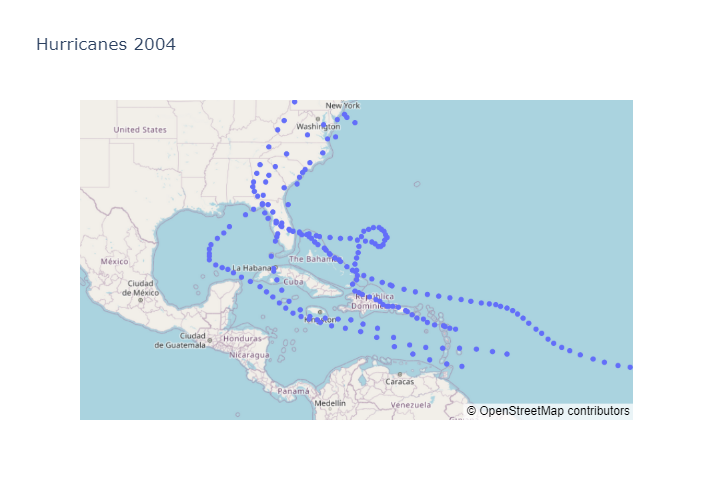

In [152]:
Atlantic_2004_map = px.scatter_mapbox(Atlantic_full_data_df,
    title = "Hurricanes 2004",
    lat="latitude",
    lon="longitude",
    hover_name='name',                                 
    zoom = 2.5,
    height = 500,
    #color="name"                                  
)

Atlantic_2004_map.update_layout(mapbox_style="open-street-map")
Atlantic_2004_map.show()

#NEED TO FIGURE OUT HOW TO CHANGE THE DOT COLORS TO DISTINGUISH STORMS

In [17]:
Andrew_file_path = Path("ANDREW_LAND.csv")
Andrew_data = pd.read_csv(Andrew_file_path)
Andrew_data.head(2)


index        id    name            date record_identifier status_of_system  \
0  37970  AL041992  ANDREW  8/24/1992 8:40                 L               HU   
1  37971  AL041992  ANDREW  8/24/1992 9:05                 L               HU   

   latitude  longitude    lat/long  maximum_sustained_wind_knots  \
0      25.5      -80.2  25.5,-80.2                           145   
1      25.5      -80.3  25.5,-80.3                           145   

   maximum_pressure  Unnamed: 11    1.85  Velocity  damage ratio  Unnamed: 15  \
0               926          NaN  268.25  0.297753      0.025719     0.297753   
1               922          NaN  268.25  0.297753      0.025719     0.297753   

   property value  
0             NaN  
1             NaN

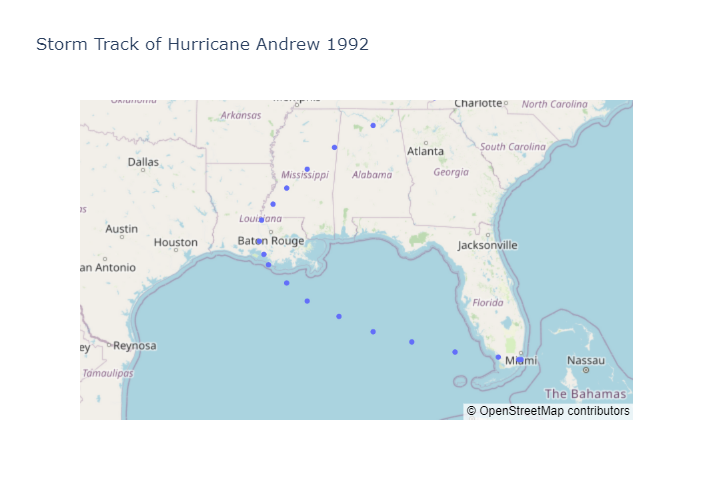

In [111]:

Andrew_map = px.scatter_mapbox(Andrew_data,
    title = "Storm Track of Hurricane Andrew 1992",
    lat="latitude",
    lon="longitude",
    zoom = 4,
    height = 500                              
)


Andrew_map.update_layout(mapbox_style="open-street-map")
Andrew_map.show()

In [208]:
Atlantic_file_path = Path("historical_losses.csv")
Atlantic_data = pd.read_csv(Atlantic_file_path)
Atlantic_data.head(2)

Atlantic_data_df = pd.DataFrame(Atlantic_data)
Atlantic_data_df.head()
Atlantic_data_df['inflation adjusted'].min()


0.0036231

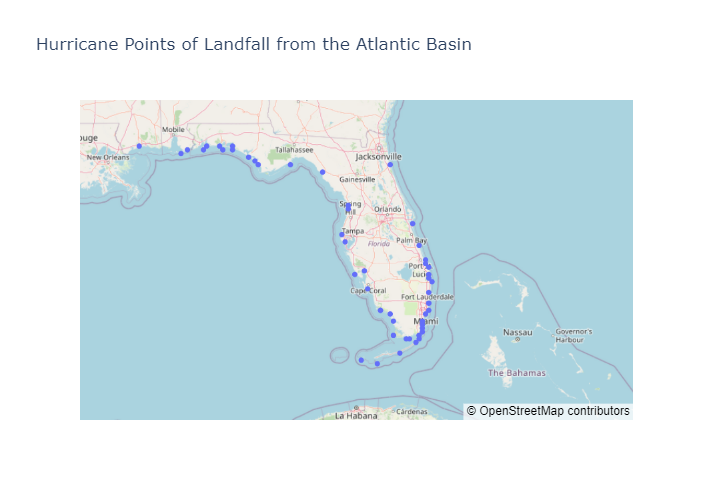

In [134]:

Atlantic_map = px.scatter_mapbox(Atlantic_data,
    title = "Hurricane Points of Landfall from the Atlantic Basin",
    lat="Lat",
    lon="Lon",
    zoom = 4.5,
    height = 500                              
)


Atlantic_map.update_layout(mapbox_style="open-street-map")
Atlantic_map.show()

#NEED TO EDIT THIS SO THE TITLE IS IN THE MIDDLE

In [43]:
Atlantic_HURDAT_path = Path("Atlantic_HURDAT.csv")
Atlantic_HURDAT_data = pd.read_csv(Atlantic_HURDAT_path)
Atlantic_HURDAT_data.head(2)

Atlantic_HURDAT_data_df = pd.DataFrame(Atlantic_HURDAT_data)
Atlantic_HURDAT_data_df.head()

index        id     name                 date record_identifier  \
0      0  AL011851  UNNAMED  1851-06-25 00:00:00               NaN   
1      1  AL011851  UNNAMED  1851-06-25 06:00:00               NaN   
2      2  AL011851  UNNAMED  1851-06-25 12:00:00               NaN   
3      3  AL011851  UNNAMED  1851-06-25 18:00:00               NaN   
4      4  AL011851  UNNAMED  1851-06-25 21:00:00                 L   

  status_of_system  latitude  longitude  maximum_sustained_wind_knots  \
0               HU      28.0      -94.8                            80   
1               HU      28.0      -95.4                            80   
2               HU      28.0      -96.0                            80   
3               HU      28.1      -96.5                            80   
4               HU      28.2      -96.8                            80   

   maximum_pressure  ...  34_kt_sw  34_kt_nw  50_kt_ne  50_kt_se  50_kt_sw  \
0               NaN  ...       NaN       NaN       NaN       NaN       NaN   
1               NaN  ...       NaN       NaN       NaN       NaN       NaN   
2               NaN  ...       NaN       NaN       NaN       NaN       NaN   
3               NaN  ...       NaN       NaN       NaN       NaN       NaN   
4               NaN  ...       NaN       NaN       NaN       NaN       NaN   

   50_kt_nw  64_kt_ne  64_kt_se  64_kt_sw  64_kt_nw  
0       NaN       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN       NaN  
4       NaN       NaN       NaN       NaN       NaN  

[5 rows x 22 columns]

In [49]:
# Read in data
Hur_losses = pd.read_csv("historical_losses.csv")
Hur_losses.head(1)

Year Region  Seq    Name  Mo  Da   Lat   Lon  Wmax  Pmin   RMW  Time  SNBR  \
0  1903   FLSE    3  Storm3   9  11  26.1 -80.1    75   976  80.0  2300   397   

   Damage (billions) 2005 #s  Code  inflation adjusted  
0                        5.2     1              7.2462

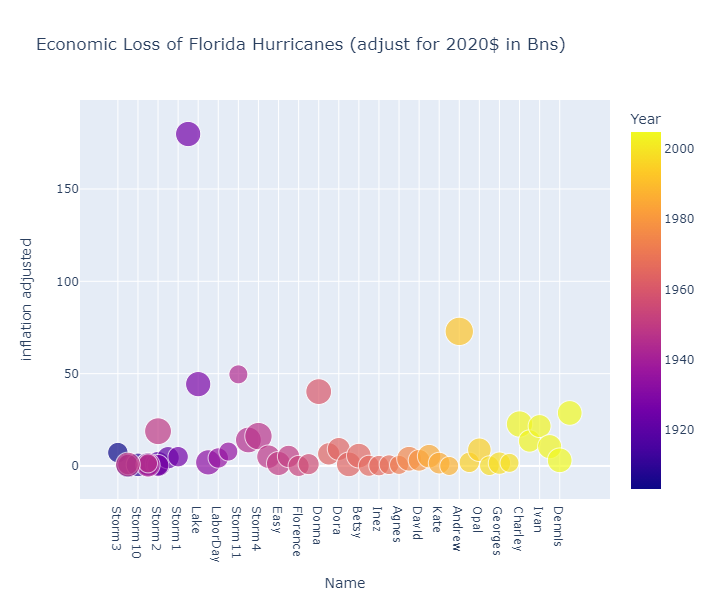

In [67]:
px.scatter(Hur_losses, 
           title="Economic Loss of Florida Hurricanes (adjust for 2020$ in Bns)",
           x="Name",
           y="inflation adjusted",
           size="Wmax",
           color="Year", 
           height=600, 
           width=800)

##NEED TO FIGURE OUT HOW TO ADJUST THE Y AXIS

In [197]:
#distribution of landfalling hurricanes in Florida

Distribution_of_storms = Path("MC_Sim_dist.csv")
Distribution_of_storms_data = pd.read_csv(Distribution_of_storms)
Distribution_of_storms_data.head()

Distribution_of_storms_df = pd.DataFrame(Distribution_of_storms_data)
Distribution_of_storms_df.head()
Distribution_of_storms_df.sort_values('# events')

# events  # of years    dist
0         0          92  54.12%
1         1          44  25.88%
2         2          25  14.71%
3         3           7   4.12%
4         4           2   1.18%

In [194]:

import hvplot.pandas



Distribution_of_storms_df.hvplot(label="distribution of florida landfalling hurricanes",
                                    rot = 60,
                                   x = '# events',
                                   y ='dist')
#NEED TO FIX THE Y AXIS

:Curve   [# events]   (dist)

In [199]:
county_housing_index = pd.read_csv("FLSTHPI.csv")
county_housing_index.head(1)

county_housing_index_df=pd.DataFrame(county_housing_index)
county_housing_index_df.head()

DATE  Florida_state_FLSTHPI  Sarasota  Miami_dade  Broward  Orange  \
0  1/1/1975                  65.95     30.88       29.39    42.49   27.85   
1  1/1/1976                  68.02     30.77       30.16    40.00   28.41   
2  1/1/1977                  71.15     31.76       32.41    39.95   29.79   
3  1/1/1978                  78.57     37.15       35.23    43.09   34.87   
4  1/1/1979                  89.77     41.59       42.42    45.61   41.83   

   Palm_Beach  Hillsborough  Pinellas    Lee  ...  Okaloosa  Levy  Taylor  \
0       41.73         31.72     32.14  39.59  ...       NaN   NaN     NaN   
1       35.91         34.82     32.47  36.57  ...       NaN   NaN     NaN   
2       38.08         36.47     34.32  43.57  ...       NaN   NaN     NaN   
3       41.80         40.31     39.06  44.41  ...       NaN   NaN     NaN   
4       48.70         45.21     45.15  46.58  ...      42.8   NaN     NaN   

   Putnam  Citrus  Sumter  Okeechobee  Monroe  Jackson  Bradford  
0     NaN     NaN     NaN         NaN     NaN      NaN       NaN  
1     NaN     NaN     NaN         NaN     NaN      NaN       NaN  
2     NaN     NaN     NaN         NaN     NaN      NaN       NaN  
3     NaN   44.94     NaN         NaN     NaN      NaN       NaN  
4     NaN   52.60     NaN         NaN     NaN      NaN       NaN  

[5 rows x 34 columns]

In [203]:
county_housing_index_df.hvplot.bar(title="House Price Index by County")

#NEED TO EDIT THIS AND OVERLAY THE # OF NAMED STORMS and add the missing data

:Bars   [index,Variable]   (value)